# Introduction
This is the imdb movies dataset. It contains movies from the year 1960 to 2015. The dataset has 10866 rows and 21 columns. The columns include `id`,`imdb_id`, `popularity`, `budget`, `revenue`, `original_title`, `cast`, `homepage`, `director`, `tagline`, `keywords`, `overview`, `runtime`, `genres`, `production_companies`, `release_date`,`vote_count`,`vote_average`,`release_year`, `budget_adj`, and `revenue_adj` <br/>

We would investigate this dataset to answer multiple questions
- What kind of properties are associated with movies that have high revenues
- What kind of properties are associated with movies that have high ratings
- Does the popularity of the movie depend on the budget used?
- The questions regarding the release year
- Analysis of the production companies
- Analysing and answering the questions about the movie genres
- Questions regarding the movie directors
- The movie with the highest revenue and its relation with the highest profit
- The movie with the highest rating

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Wrangling
Finding the properties of the dataset as well as cleaning it for proper analysis.
Here we would be checking for the following

- Number of rows and columns
- Number of unique values
- The data type for each column
- The columns with missing values
- The duplicate rows in the dataset

###### We would start by loading our dataset

In [2]:
#Load the dataset
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


###### Number of Unique Values in the dataset

In [3]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [4]:
#The rows in the genre column contain multiple values, so we want to figure out how many unique words in it
df['genres'].unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

In [5]:
#Finding the unique values in the keywords column to check if they can be useful in our analysis
df['keywords'].unique()

array(['monster|dna|tyrannosaurus rex|velociraptor|island',
       'future|chase|post-apocalyptic|dystopia|australia',
       'based on novel|revolution|dystopia|sequel|dystopic future', ...,
       'car race|racing|formula 1', 'car|trolley|stealing car',
       'fire|gun|drive|sacrifice|flashlight'], dtype=object)

###### Number of rows and columns contained in the dataset

In [6]:
#We use the shape function to find the number or rows and columns in this dataset
df.shape

(10866, 21)

###### Datatype of the datset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
type(df['release_date'][0])

str

In [9]:

#From the statistics provided, some of the numerical columns contain multiple zero values
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [10]:
#Checking to see how many zero values in the numerical columns
zero_col = ['popularity','budget','revenue','runtime','budget_adj','revenue_adj']

for x in zero_col:
    zero = (df[x] == 0).sum()
    print(x, 'column has ', zero, 'zeroes')

popularity column has  0 zeroes
budget column has  5696 zeroes
revenue column has  6016 zeroes
runtime column has  31 zeroes
budget_adj column has  5696 zeroes
revenue_adj column has  6016 zeroes


###### Check for duplicate values and how many they are

In [11]:
#Check if there are duplicate values
df.duplicated().any()

True

In [12]:
#Check the number of duplicate values
df.duplicated().sum()

1

###### Check for the columns with null values

In [13]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [14]:
df.isnull().any(axis=1).sum()

8874

# Data Cleaning
In the data cleaning process of this dataset. We would do the following
- Remove the duplicate values 
- Remove the columns we do not need for our analysis
- Change the data type of the `release_date` column
- Replace the zero values with their mean values
- Create a `profit` column to analyse which movie made profits

###### Drop the duplicate values 

In [15]:
#Drop the duplicate rows
df.drop_duplicates(inplace=True)
#After dropping the duplicate values, we confirm that there are no duplicates. Value should be 0
df.duplicated().sum()

0

#### Drop the columns that are not relevant to our analysis
These columns include `id`,`budget`,`revenue`,`imdb_id`,`homepage`, `tagline`, `overview`, `keywords`,`release_date`

In [16]:
df.drop(['id','budget','revenue','imdb_id','homepage','tagline','overview','keywords','release_date'], axis=1,inplace = True)
df.head(1)

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09


In [17]:
#Drop the NAN values in the dataset
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9772 non-null   float64
 1   original_title        9772 non-null   object 
 2   cast                  9772 non-null   object 
 3   director              9772 non-null   object 
 4   runtime               9772 non-null   int64  
 5   genres                9772 non-null   object 
 6   production_companies  9772 non-null   object 
 7   vote_count            9772 non-null   int64  
 8   vote_average          9772 non-null   float64
 9   release_year          9772 non-null   int64  
 10  budget_adj            9772 non-null   float64
 11  revenue_adj           9772 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 992.5+ KB


###### Replacing the zero values with the mean in each column

In [18]:
#Fill the zero values with the mean for every column
df = df.mask(df==0).fillna(df.mean(numeric_only=True))
                         
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9772.000000,9772.000000,9772.000000,9772.000000,9772.000000,9.772000e+03,9.772000e+03
mean,0.694721,103.063554,239.312014,5.963528,2000.878428,2.885575e+07,8.637367e+07
std,1.036931,27.623136,603.011504,0.913174,13.036794,3.161753e+07,1.428436e+08
min,0.000188,3.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.232710,91.000000,18.000000,5.400000,1994.000000,1.941599e+07,4.908911e+07
50%,0.419762,100.000000,46.000000,6.000000,2005.000000,1.941599e+07,5.705309e+07
75%,0.776408,112.000000,173.000000,6.600000,2011.000000,2.464268e+07,5.705309e+07
max,32.985763,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


###### Profit column to help with the analysis

In [19]:
#Creating a profit column by subtracting the budget from the revenue
df['profit'] = df['revenue_adj'] - df['budget_adj']
df.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [20]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,9772.000000,9772.000000,9772.000000,9772.000000,9772.000000,9.772000e+03,9.772000e+03,9.772000e+03
mean,0.694721,103.063554,239.312014,5.963528,2000.878428,2.885575e+07,8.637367e+07,5.751791e+07
std,1.036931,27.623136,603.011504,0.913174,13.036794,3.161753e+07,1.428436e+08,1.266513e+08
min,0.000188,3.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00,-4.139124e+08
25%,0.232710,91.000000,18.000000,5.400000,1994.000000,1.941599e+07,4.908911e+07,1.602789e+07
50%,0.419762,100.000000,46.000000,6.000000,2005.000000,1.941599e+07,5.705309e+07,3.763710e+07
75%,0.776408,112.000000,173.000000,6.600000,2011.000000,2.464268e+07,5.705309e+07,4.611879e+07
max,32.985763,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9772 non-null   float64
 1   original_title        9772 non-null   object 
 2   cast                  9772 non-null   object 
 3   director              9772 non-null   object 
 4   runtime               9772 non-null   float64
 5   genres                9772 non-null   object 
 6   production_companies  9772 non-null   object 
 7   vote_count            9772 non-null   int64  
 8   vote_average          9772 non-null   float64
 9   release_year          9772 non-null   int64  
 10  budget_adj            9772 non-null   float64
 11  revenue_adj           9772 non-null   float64
 12  profit                9772 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 1.0+ MB


# Data Exploration

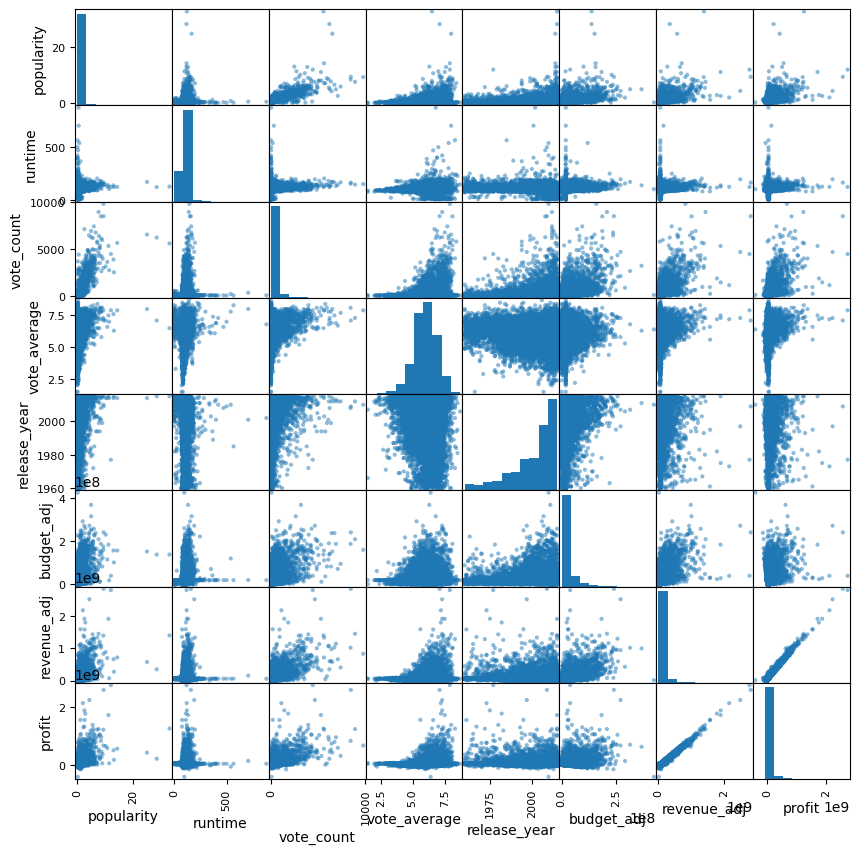

In [22]:
#Using the sactter matrix to evaluate the relationship between a combination of variables
pd.plotting.scatter_matrix(df, figsize=(10,10));

###### Does the popularity of the movie depend on the budget used?

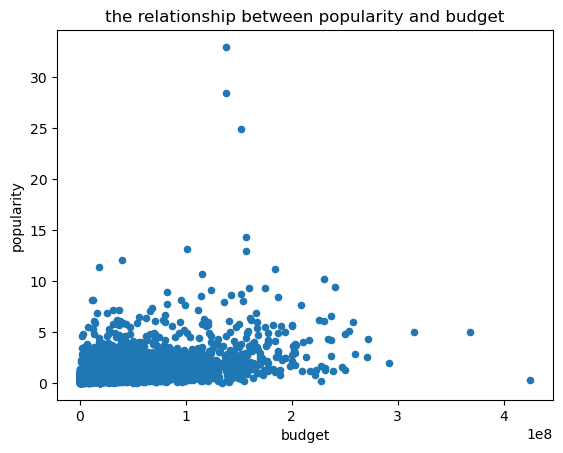

In [23]:
df.plot.scatter('budget_adj','popularity')
plt.title('the relationship between popularity and budget')
plt.xlabel('budget')
plt.ylabel('popularity');

In [24]:
#From the scatterplot, there is no correlation between the budget and popularity

In [25]:
df['budget_adj'].corr(df['popularity'])

0.4727455952841749

There is a no correlation between the `budget_adj` and `popularity` 

## What properties are associated with movies with high revenue

In [26]:
#Let us find the movies with the highest revenue
high_revenue = df.query('revenue_adj >= 100000000')
high_revenue.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [27]:
high_revenue.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1.482000e+03,1.482000e+03,1.482000e+03
mean,1.888354,115.342780,1012.204453,6.395951,1999.347503,7.224129e+07,3.093121e+08,2.370708e+08
std,2.028288,26.430216,1200.479859,0.711076,12.435873,5.305472e+07,2.706277e+08,2.530711e+08
min,0.017498,44.000000,10.000000,4.100000,1960.000000,2.248029e+02,1.000516e+08,-6.387503e+07
25%,0.868049,99.000000,253.500000,5.900000,1993.000000,3.081917e+07,1.446003e+08,9.473900e+07
50%,1.348873,112.000000,583.500000,6.400000,2002.000000,6.004554e+07,2.132732e+08,1.505710e+08
75%,2.215830,127.000000,1272.750000,6.900000,2009.000000,9.900546e+07,3.692795e+08,2.864388e+08
max,32.985763,705.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09,2.750137e+09


###### The average popularity of the high revenue movies

In [28]:
high_revenue['popularity'].mean()

1.8883540290148422

###### The average budget of high revenue movies

In [29]:
high_revenue['budget_adj'].mean()

72241289.3614892

###### The average runtime of high revenue movies

In [30]:
high_revenue['runtime'].mean()

115.34278002699055

###### The average revenue of high revenue movies

In [31]:
high_revenue['revenue_adj'].mean()

309312077.4594927

###### The average rating of movies with high revenue

In [32]:
high_revenue['vote_average'].mean()

6.3959514170040555

##### What is the movie with the highest revenue

In [33]:
#Finding the movie with the highest revenue
#First we find the row
movie_with_highest_revenue = high_revenue['revenue_adj'].idxmax()

#using the row index to find the details of the movie
df.loc[[movie_with_highest_revenue]][['original_title','revenue_adj']]

,original_title,revenue_adj
1386,Avatar,2.827124e+09


The movie with the highest revenue was avatar with 2.82 Billion

###### Is there a correlation between the revenue and the profit

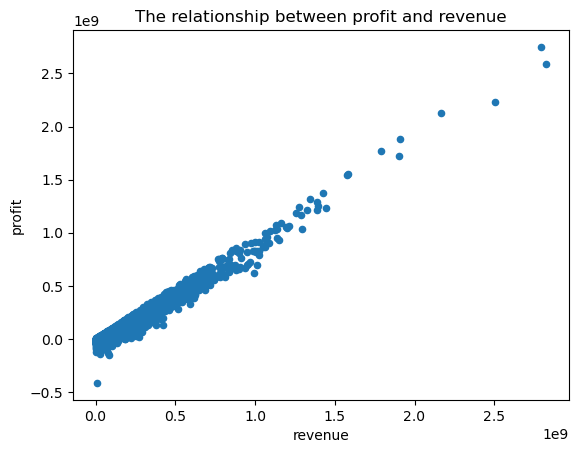

In [34]:
df.plot.scatter('revenue_adj', 'profit')
plt.title('The relationship between profit and revenue')
plt.xlabel('revenue')
plt.ylabel('profit');

From the scatter plot, there is a high correlation between the `revenue_adj` and the `profit`. If that is so, let us check to see if the movie with the highest revenue made the highest profit

### What is the movie with the highest profit

In [35]:
#Finding the movie with the highest profit
movie_with_highest_profit = df['profit'].idxmax()

#We find the title of the movie and the amount of profit it made
df.loc[[movie_with_highest_profit]][['original_title','revenue_adj','profit']]

,original_title,revenue_adj,profit
1329,Star Wars,2.789712e+09,2.750137e+09


Although the avatar movie made the highest revenue, it was not the movie with  the highest profit. Star Wars made the highest profit with 2.75 Billion

## What properties are associated with movies with high ratings

In [36]:
#Using ratings above 7
high_ratings = df.query('vote_average >= 7')
high_ratings.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09
5,9.110700,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156.0,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,3929,7.2,2015,1.241999e+08,4.903142e+08,3.661143e+08
7,7.667400,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141.0,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,4572,7.6,2015,9.935996e+07,5.477497e+08,4.483897e+08


###### What is the average popularity of the movies with high ratings

In [37]:
high_ratings['popularity'].mean()

1.2566465257575739

###### What is the average budget of the movies with high ratings

In [38]:
high_ratings['budget_adj'].mean()

31538638.839434683

##### What is the average profit of movies with high ratings

In [39]:
high_ratings['profit'].mean()

115126954.21744576

###### what is the average runtime for movies with high rating

In [40]:
high_ratings['runtime'].mean()

109.61363636363636

### What is the movie with the highest rating

In [41]:
#Finding the movie with the highest rating
movie_with_highest_rating = high_ratings['vote_average'].idxmax()

#using the row index to find the details of the movie
df.loc[[movie_with_highest_rating]][['original_title','vote_average','release_year']]

,original_title,vote_average,release_year
6911,Pink Floyd: Pulse,8.7,2006


the title of the highest rated movie is Pink Floyd: Pulse with a rating of 8.7. It was released in the year 2006

## Questions regarding the years

##### What year has the highest average profit

In [42]:
df.groupby('release_year')['profit'].mean().idxmax()

1977

##### What year has the highest average rating

In [43]:
df.groupby('release_year')['vote_average'].mean().idxmax()

1973

###### The year with the most movie release

In [44]:
df['release_year'].value_counts().idxmax()

2014

In [45]:
""" 
In our Exploratorary analysis, our we are going to be answering questions around the Top ten values in different columns
So in our bid to work efficiently, we are going to define a function that allows us plot a bar chart for top 10 values
"""

def top_10_bar(col_name):
    col_name.value_counts().head(10).plot(kind='bar')

###### Top 10 years with the most movie release 

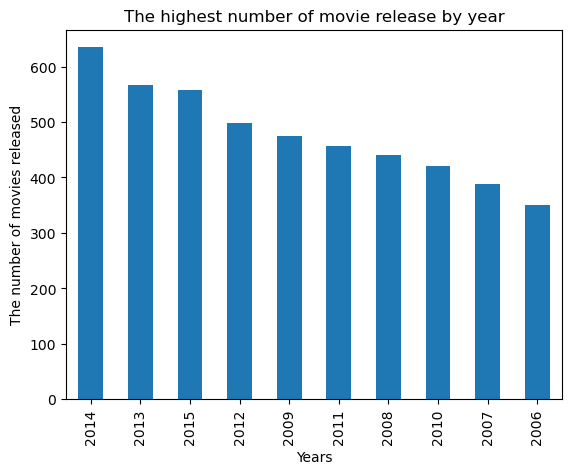

In [46]:
top_10_bar(df.release_year)
plt.title('The highest number of movie release by year')
plt.xlabel('Years')
plt.ylabel('The number of movies released');

In [47]:
#From the bar plot, the year 2014 had the highest number of movie released with above 600 movies

,release_year
count,9772.000000
mean,2000.878428
std,13.036794
min,1960.000000
25%,1994.000000
50%,2005.000000
75%,2011.000000
max,2015.000000


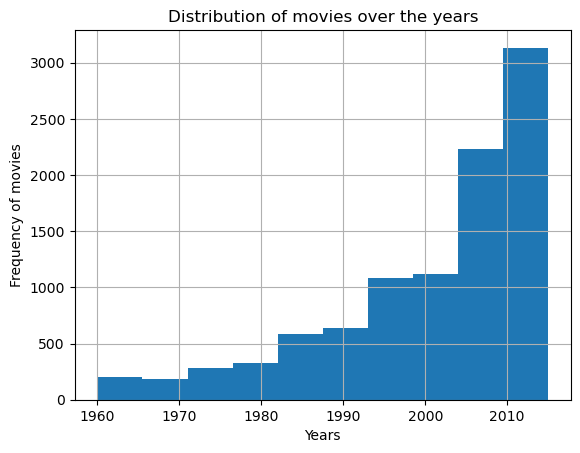

In [48]:
ax = df['release_year'].hist()
ax.set_ylabel('Frequency of movies')
ax.set_xlabel('Years')
ax.set_title('Distribution of movies over the years');
pd.DataFrame(df['release_year'].describe())

In [49]:
"""From the plot, we can see that the data is skewed to the left, which means 
that there were more low number of movies released in the early years than in later years
"""

'From the plot, we can see that the data is skewed to the left, which means \nthat there were more low number of movies released in the early years than in later years\n'

###### The year with the least movie release

In [50]:
df['release_year'].value_counts().idxmin()

1969

###### Does the profit depend on the year the movie was released

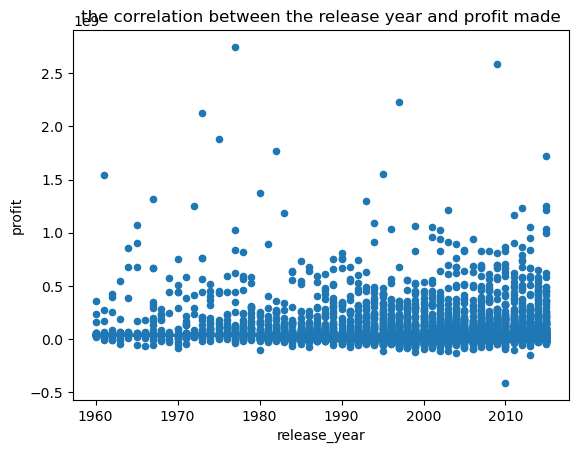

In [51]:
df.plot('release_year','profit', kind='scatter');
plt.title('the correlation between the release year and profit made')
plt.xlabel('release_year')
plt.ylabel('profit');

There is no correlation between `release_year` and `profit`

## Questions regarding the movie genres

In [52]:
#Let us make a copy of our dataframe so that the splitting only affects the copy
df_1 = df.copy()
#First we split the genre column
df_1['genres'] = df_1['genres'].str.split('|')
#Then we transform each element in the column list to a row
df_1 = df_1.explode('genres',ignore_index=True).drop_duplicates()
#We confirm the changes
df_1.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Adventure,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
2,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
3,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
4,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08


In [53]:
""" 
For this section, we are looking for the highest average of various variables
We would first groupby the columns then plot either bar plots or barh plots 
Since we would be plotting the bar plot in multiple places, we would define a function that plots the bar or barh graphs 
"""
def bar_plot(col_name):
    col_name.mean().sort_values(ascending=True).plot(kind='bar')
    
#We can also define a barh function to plot horizontal bar plots
def barh_plot(col_name):
    col_name.mean().sort_values(ascending=True).plot(kind='barh')

##### The highest average rated genres

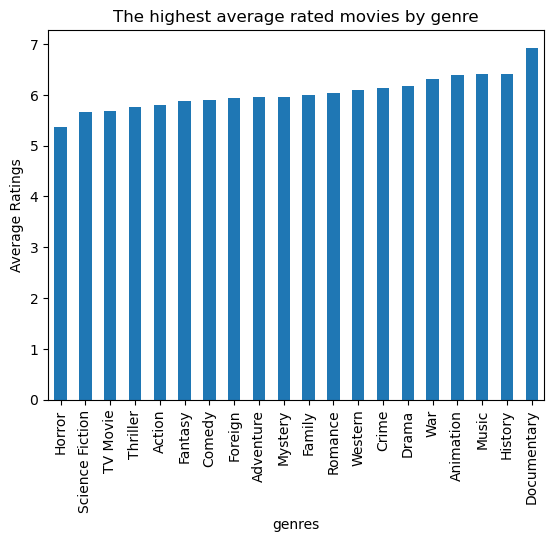

In [54]:
highest_avg_rated = df_1.groupby('genres')['vote_average']
bar_plot(highest_avg_rated)

plt.title('The highest average rated movies by genre')
plt.xlabel('genres')
plt.ylabel('Average Ratings');

In [55]:
#From the plot, we can see that the documentary genre had the highest average rating

###### The Most Popular Genre

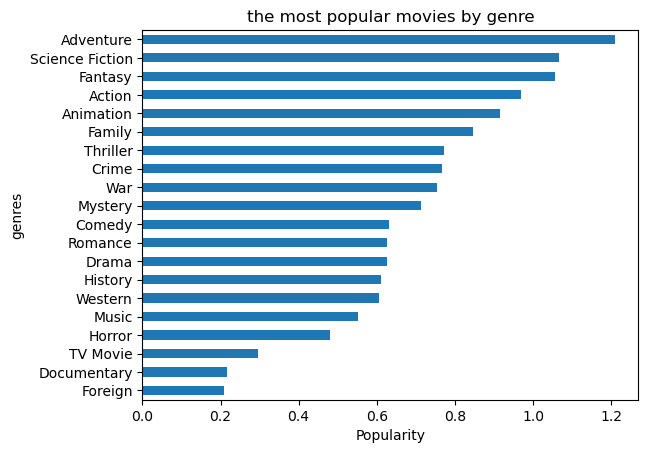

In [56]:
most_popular_genre = df_1.groupby('genres')['popularity']
barh_plot(most_popular_genre)
plt.title('the most popular movies by genre')
plt.xlabel('Popularity')
plt.ylabel('genres');

In [57]:
#The most popular genre of movies was Adventure with an average of 1.2 million

###### Genre with the highest average profit

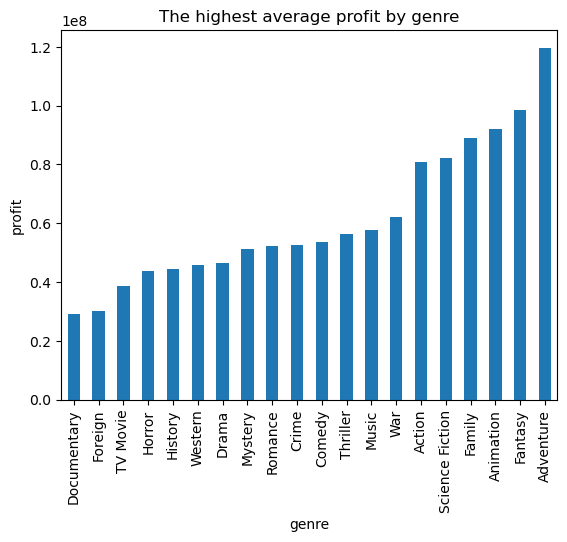

In [58]:
bar_plot(df_1.groupby('genres')['profit'])
plt.title('The highest average profit by genre')
plt.xlabel('genre')
plt.ylabel('profit');

In [59]:
#The genre that has made the most profit over the years is the Adventure genre with about 120 million dollars

##### The genre that has been released the most over the years

,release_year
genres,
Drama,4364
Comedy,3433
Thriller,2746
Action,2235
Romance,1570
Horror,1526
Adventure,1384
Crime,1299
Science Fiction,1136


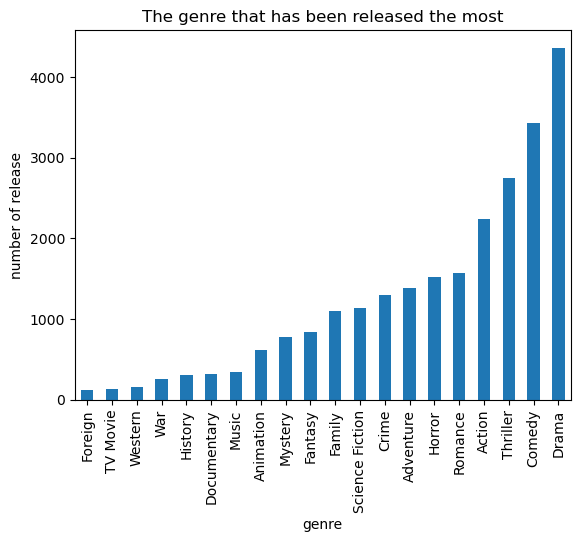

In [60]:
df_1.groupby('genres')['release_year'].count().sort_values(ascending=True).plot(kind='bar');
plt.title('The genre that has been released the most')
plt.xlabel('genre')
plt.ylabel('number of release');

df_1.groupby(['genres'])[['release_year']].count().sort_values(by ='release_year', ascending=False)

In [61]:
#The genre that has been released the most over the years is Drama, followed by Comedy

# Questions regarding the movie directors

In [62]:
#First we make a copy of the dataframe 
df_2 = df.copy()
#Then we split the director column
df_2['director'] = df_2['director'].str.split('|')
#Then we transform each element in the column list to a row
df_2 = df_2.explode('director',ignore_index=True).drop_duplicates()
#Confirming the changes
df_2.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


#### Who is the most popular director

In [63]:
df_2.groupby('director')['popularity'].mean().sort_values(ascending=False)

director
Colin Trevorrow      16.696886
David Leitch         11.422751
Chad Stahelski       11.422751
Alan Taylor           6.883129
Christopher Nolan     6.865185
                       ...    
Ken Burns             0.001783
Stephen Cragg         0.001423
Nacho G. Velilla      0.001317
Dibakar Banerjee      0.001115
Pascal Thomas         0.000973
Name: popularity, Length: 4758, dtype: float64

In [64]:
df_2.groupby(['director'])['popularity'].mean().idxmax()

'Colin Trevorrow'

##### What movies was our most popular director involved in

In [65]:
df_2.query('director == "Colin Trevorrow"')[['original_title']]

,original_title
0,Jurassic World
4589,Safety Not Guaranteed


###### Who has the highest average rating 

In [66]:
df_2.groupby(['director'])['vote_average'].mean().idxmax()

'David Mallet'

###### Top 10 directors with the highest rating

In [67]:
top_10_dir = df_2.groupby(['director'])['vote_average'].mean().sort_values(ascending = False)
top_10_dir.head(10)

director
David Mallet              8.7
Saul Swimmer              8.5
Curt Morgan               8.5
Michael Henry Wilson      8.5
Jorge RamÃ­rez SuÃ¡rez    8.4
Dean Wellins              8.3
Claude Lanzmann           8.3
Adam Curtis               8.3
Damien Chazelle           8.2
Ã‡aÄŸan Irmak             8.2
Name: vote_average, dtype: float64

##### Top 10 directors with the most movies over the years

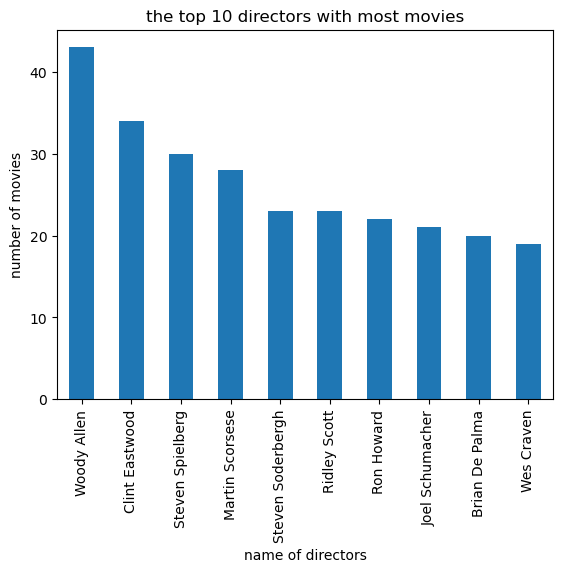

In [68]:
#Calling our top 10 function
top_10_bar(df_2.director)
plt.title('the top 10 directors with most movies')
plt.xlabel('name of directors')
plt.ylabel('number of movies');

# Questions regarding the production company

In [69]:
#First we make a copy of the dataframe 
df_3 = df.copy()
#Then we split the values in the columns
df_3['production_companies'] = df_3['production_companies'].str.split('|')
#Then we transform each element in the column list to a row
df_3 = df_3.explode('production_companies',ignore_index=True).drop_duplicates()
#Confirming the changes
df_3.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Amblin Entertainment,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
2,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Legendary Pictures,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
3,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Fuji Television Network,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
4,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Dentsu,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


##### Production company with the highest average rating

In [70]:
df_3.groupby(['production_companies'])['vote_average'].mean().idxmax()

'EMI'

###### The most popular production company

In [71]:
df_3.groupby(['production_companies'])['popularity'].mean().idxmax()

'Bulletproof Cupid'

###### The production company that has made the highest average profit

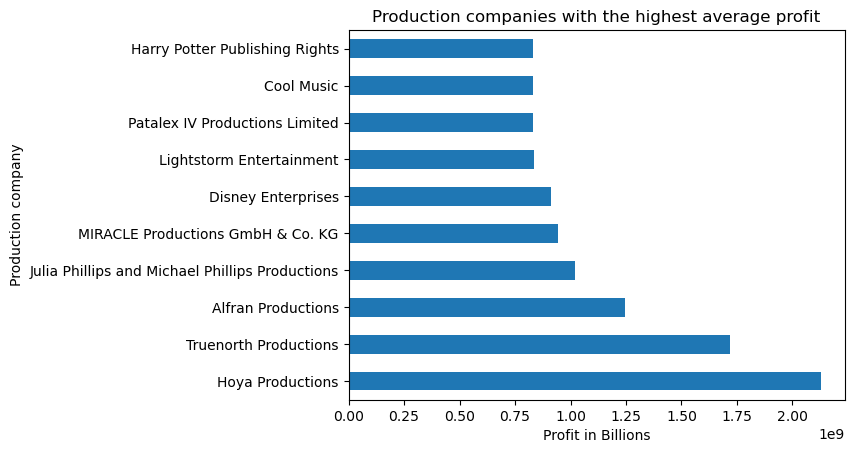

In [72]:
df_3.groupby(['production_companies'])['profit'].mean().sort_values(ascending = False).head(10).plot(kind='barh')
plt.title('Production companies with the highest average profit')
plt.xlabel('Profit in Billions')
plt.ylabel('Production company');

The production company with the highest average profit is Hoya Productions

##### Top 10 production companies with high average ratings

In [73]:
top_10_comp = df_3.groupby(['production_companies'])['vote_average'].mean().sort_values(ascending = False)
top_10_comp.head(10)

production_companies
EMI                                                    8.7
SMV Enterprises                                        8.7
Red Bull Media House                                   8.5
Brain Farm Digital Cinema                              8.5
Edel records GmbH                                      8.5
Beanca Films                                           8.4
Arnold Stiefel Company                                 8.4
Talking Heads                                          8.4
Fondo de InversiÃ³n y EstÃ­mulos al Cine (FIDECINE)    8.4
MPN Cologne Film 3                                     8.4
Name: vote_average, dtype: float64

###### The top 10 production companies with the most movies

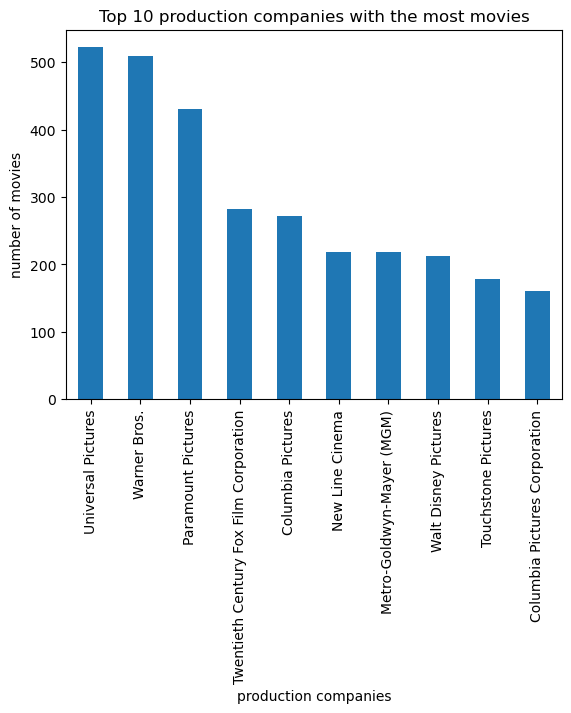

In [74]:
#Recalling our top 10 function
top_10_bar(df_3.production_companies)
plt.title('Top 10 production companies with the most movies')
plt.xlabel('production companies')
plt.ylabel('number of movies');

Universal pictures is the production company with the most movies, it has released an average of 500 movies from 1960 to 2015

# Conclusion
Before starting the analysis, we asked couple of questions which we explored. The dataset has been explored and the questions have been answered


- The properties of movies that have a high revenue; We used revenue equal to and above 100 million dollars
>The average popularity was 1.88 million <br/>
The average budget was 72.2 million dollars <br/>
The average runtime was 115 minutes <br/>
The average revenue was around 309.3 million dollars <br />
The average rating was around 6.39 <br/>
The movie with the highest revenue was Avatar with 2.82 Billion dollars<br/>
>>There was positive correlation between `revenue_adj` and `profit` so we needed to find out if the highest revenue movie was also the movie with the highest profit. Our conclusion was : <br/>
>>>Star Wars made the highest profit with 2.75 Billion. Although the Avatar movie made the highest revenue, it was not the movie with  the highest profit. 


- The properties of movies with a high rating; we used ratings equal to and above 7
> The average popularity was 1.25 million <br/>
The average budget was around 31.5 million dollars <br/>
The average runtime was 109 minutes <br/>
The average profit was 115.1 million dollars <br/>
The highest rated movie was Pink Floyd: Pulse with a rating of 8.7. It was released in the year 2006
- Does the popularity of the movies depend on the budget
> There was no correlation between `popularity` and `budget_adj`, which means that how popular your movie will become does not depend on the budget used
- Question about the movie release years
> The year with the highest average profit was 1977 <br/>
The year with the highest average rating was 1973 <br/>
The profit made by the movies was not dependent on the movie year, because there was no correlation between `release_year` and `profit`<br/>
The year with the most movie release was 2014
The year with the least movie release was 1969

- Questions about the movie genres
> The highest rated genre was documentary <br/>
The most popular genres were adventure, Science fiction and Fantasy <br/>
>The movie that has been released the most over the years was drama <br/>
>The genre with the highest average profit was Adventure, Fantasy and Animation. 
>>Consider these genre as you try to make your movies. Also you should avoid documentary, as it's likely not going to be profitable <br/>


- Questions regarding the movie directors
>The most popular director was Colin Trevorrow <br/>
The movies that Colin Trevorrow directed include Jurassic World and Safety Not Guaranteed<br/>
The director with the highest average rating was David Mallet <br/>
The director with the most movies is Woody Allen

- Questions regarding the production companies
> The production company with the highest average rating was EMI <br/>
The most popular production company was Bulletproof Cupid <br/>
The production company with the most movies is Universal pictures<br/>
The production companies with the highest average profit were Hoya production and True North Productions. 
>>You should consider these companies if your aim is to make more profit.

#### Summary
The highest rating of movies was 8.7, and the movie with the highest rating was Pink Floyd: Pulse. In 2014, more movies was released than every other year in the dataset while the year with the least movie release was 1969. the highest profit made was by Star Wars with 2.75 Billion Dollars

If your goal is to make more profit, you should consider going for the adventure, science fiction or animation genre. And a production company to have in mind for your movie pitch is Hoya Productions

#### Limitation
One of the limitations from analysing this dataset was the Nan values and the zero values, the answers were based solely on the cleaned data. If some values were not dropped, the analysis might have been different.